In [58]:
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None) # Display all columns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import numpy as np

# Exploring the data

First thing to do is to inspect the data, look for missing data, think about potential transformations

In [13]:
input_fname = Path("dataset.csv")
df = pd.read_csv(input_fname, low_memory=False)

In [14]:
df.head()

,SALESFORCEACCOUNTID,ACCOUNTING_MONTH,RENEWAL_MONTH,CONTRACT_START_DATE,REGION,SECTOR,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
0,0011N00001hBZM7QAO,2021-10-01 00:00:00+00:00,2021-12-01T00:00:00Z,2020-12-24T00:00:00Z,UKI,Professional Services,126,NaN,NaN,364,27241.17,330,0,1.015152,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,21,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
1,0011N00001hBZM7QAO,2021-11-01 00:00:00+00:00,2021-12-01T00:00:00Z,2020-12-24T00:00:00Z,UKI,Professional Services,127,NaN,NaN,364,27241.17,330,0,1.021212,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,22,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
2,0011N00001hBZM7QAO,2021-12-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,128,NaN,NaN,364,30349.76,350,0,0.940000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
3,0011N00001hBZM7QAO,2022-01-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,129,NaN,NaN,364,30349.76,350,0,0.960000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,1,0,0,0,0,0,0,0,0,0,0,116598,0,0,0,11525,362,4,14,1892,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
4,0011N00001hBZM7QAO,2022-02-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,130,NaN,NaN,364,30349.76,350,0,0.940000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,40704,0,0,0,3804,194,17,4,737,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 82 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SALESFORCEACCOUNTID                   100000 non-null  object 
 1   ACCOUNTING_MONTH                      100000 non-null  object 
 2   RENEWAL_MONTH                         100000 non-null  object 
 3   CONTRACT_START_DATE                   100000 non-null  object 
 4   REGION                                100000 non-null  object 
 5   SECTOR                                84930 non-null   object 
 6   TENURE_MONTHS                         100000 non-null  int64  
 7   DNB_GLOBAL_SALES_REVENUE              61863 non-null   float64
 8   DNB_GLOBAL_EMPLOYEE_COUNT             61863 non-null   float64
 9   CONTRACT_LENGTH                       100000 non-null  int64  
 10  ARR                                   100000 non-null  float64
 11  S

Initial thoughts:
1. Missing data in columns 5,7,8,78, 79, 80 will have to be either imputed or dropped
2. "ACCOUNTING_MONTH", "RENEWAL_MONTH", "CONTRACT_START_DATE" are likely to need converted to datetime objects
3. Seems like we have repetition in the "SALESFORCEACCOUNTID". According to the instructions this is a unique customer identifier, so we are dealing with less that 100,000 customers. 

In [18]:
num_unique_customers = len(df["SALESFORCEACCOUNTID"].unique())
num_unique_customers

3336

In [19]:
df.describe()

,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
count,100000.000000,6.186300e+04,6.186300e+04,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,1190.000000,365.000000,2444.000000,100000.000000
mean,43.069110,3.049351e+09,7.569068e+03,394.787380,2.497715e+04,839.213360,79.165750,0.687032,0.872780,0.554010,0.157250,0.514190,0.853340,0.182790,0.00972,0.009200,0.937680,0.293340,0.078530,0.003210,0.023350,0.673970,0.001280,0.023860,0.054240,0.195320,0.154170,0.029560,0.0,0.0,0.000110,0.127650,0.000700,0.085270,0.046470,0.003020,0.015040,0.151310,3.176640,4.124640,1.466250,4.142670,0.003530,0.001120,0.003700,0.010380,0.006840,0.00690,0.327410,0.064780,0.115540,0.015770,3.969551e+04,4.315370,0.004760,0.000440,1.526064e+03,8.878767e+02,5.762740,29.245010,124.81959,3.236970,3.335960,230.784030,11.480216,0.000260,0.001470,0.000760,0.00595,0.693800,0.112490,0.710370,3.854205,7.671233,1.884990,0.006700
std,33.474739,2.298173e+10,7.891647e+04,191.093602,7.808207e+04,5141.421066,541.602022,5.335789,0.333221,0.497077,0.364038,0.499801,0.353768,0.386496,0.09811,0.095475,0.241737,0.455295,0.269005,0.056566,0.151013,0.468761,0.035754,0.152614,0.226492,0.396449,0.361113,0.169371,0.0,0.0,0.010488,0.333911,0.026448,0.279284,0.210597,0.072876,0.137891,0.690406,7.034729,4.360022,5.348464,4.194617,0.059309,0.033448,0.060715,0.101353,0.082421,0.08278,0.469271,0.246138,0.319674,1.081385,1.553936e+06,62.915409,0.068829,0.020972,1.276661e+04,2.001648e+04,55.754312,799.757938,3212.78762,61.808063,19.923056,1387.088712,26.275033,0.018437,0.044809,0.031614,0.08423,1.500201,0.454112,3.898925,0.936484,2.934518,0.413348,0.081579
min,-1.00000

TENURE_MONTHS and CONTRACT_LENGTH have a min of -1, this will need further investigating

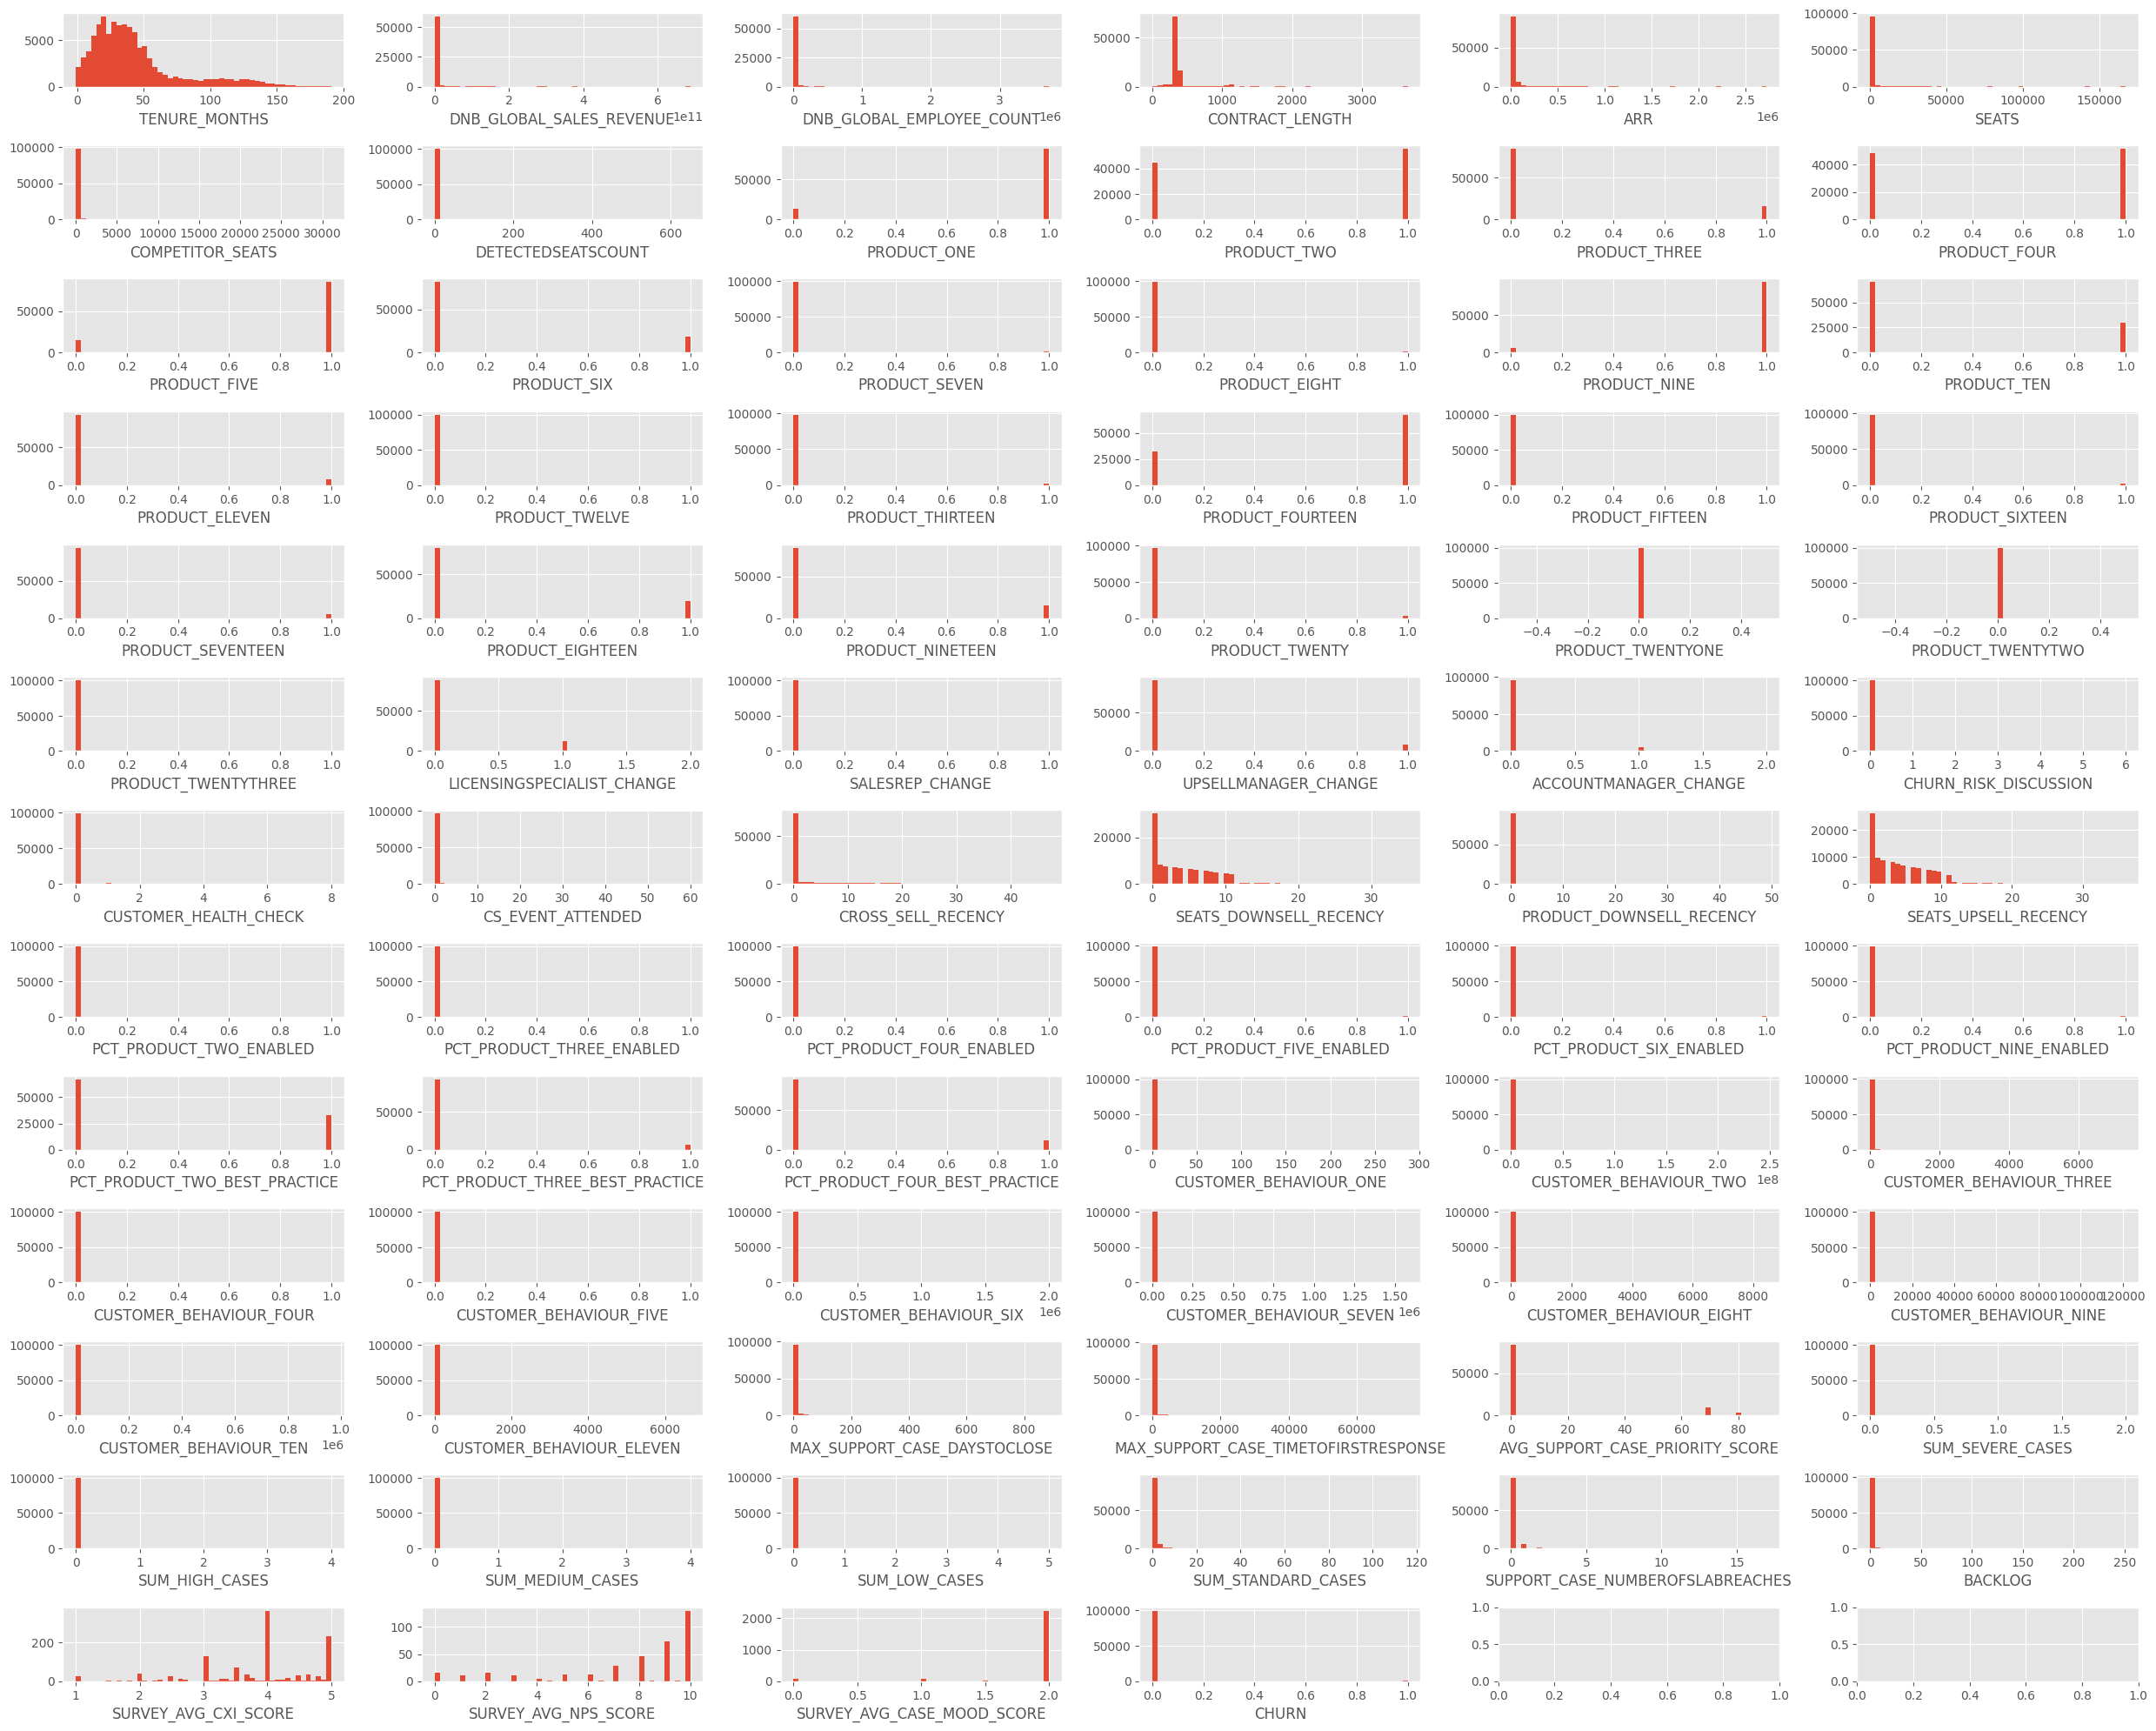

In [49]:
df_numeric = df.select_dtypes(include = 'number')
len(df_numeric.columns)
fig, axes = plt.subplots(nrows = 13, ncols = 6, figsize = (25,20))
axes = np.ravel(axes)
for ax, col in zip(axes, df_numeric.columns):
    ax.hist(df[col], bins = 50)
    ax.set(xlabel = col)
plt.tight_layout()

A lot of features are tail heavy, i.e they extend to the right of the median. This indicates some transformations may be required later to make them more normal-distribution shaped. 

In [28]:
df['CHURN'].value_counts()

CHURN
0    99330
1      670
Name: count, dtype: int64

In [29]:
100*(df['CHURN'].value_counts()[1] / len(df))

0.67

Dataset is highly imbalanced with only 0.67% of the data having positive targets. 

In [57]:
corr = df_numeric.corr()
corr['CHURN'].sort_values(ascending = False)

CHURN                         1.000000
CUSTOMER_BEHAVIOUR_FOUR       0.202693
SEATS_DOWNSELL_RECENCY        0.035692
DETECTEDSEATSCOUNT            0.021347
SURVEY_AVG_CASE_MOOD_SCORE    0.016919
                                ...   
PRODUCT_ONE                  -0.033021
SURVEY_AVG_NPS_SCORE         -0.047777
SEATS_UPSELL_RECENCY         -0.068108
PRODUCT_TWENTYONE                  NaN
PRODUCT_TWENTYTWO                  NaN
Name: CHURN, Length: 76, dtype: float64

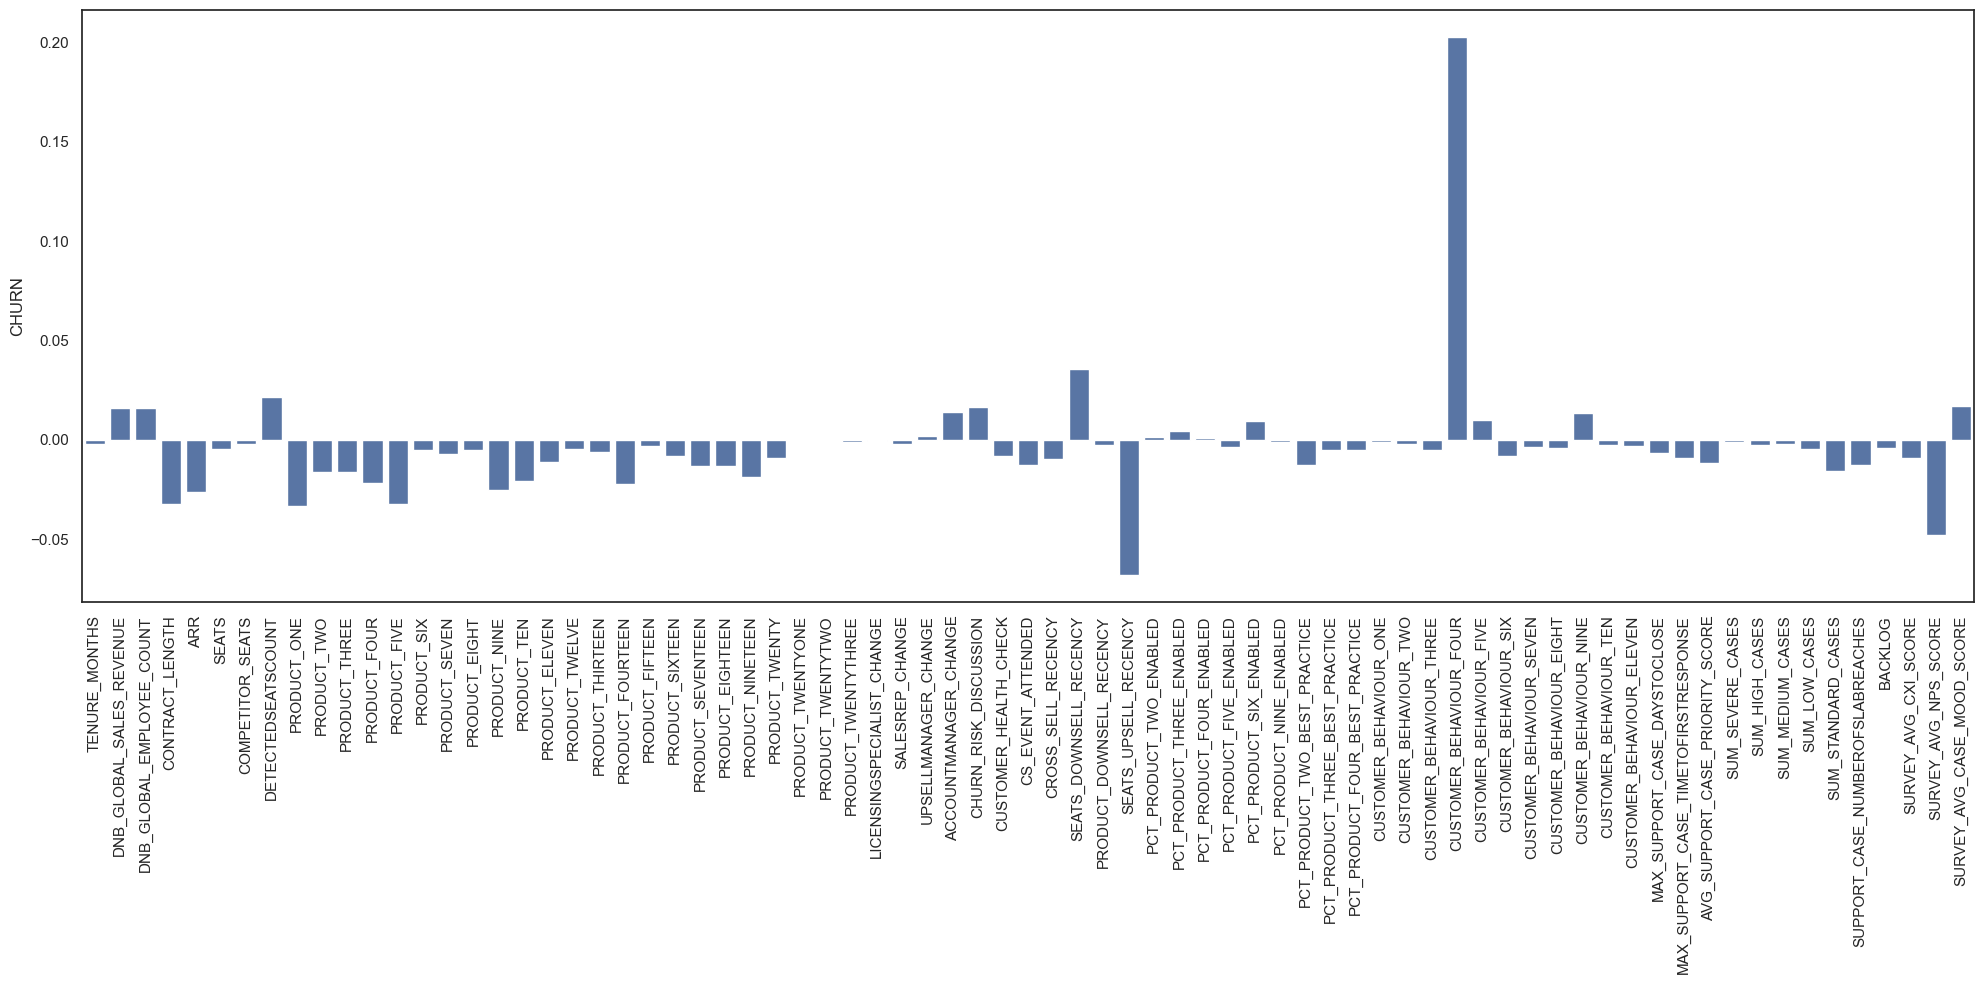

In [76]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(corr['CHURN'].drop('CHURN'), ax = ax)
plt.xticks(rotation=90);
plt.tight_layout();

"CUSTOMER_BEHAVIOUR_FOUR" has a positive correlation with churn, however a value of 0.2 is not over useful. 